# Practical Statistics for DS

In [1]:
!pip install researchpy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import researchpy as rp

SEED = 709

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## t-test

The t-test quantifies the difference between the arithmetic means of the two samples. The p-value quantifies the probability of observing as or more extreme values assuming the null hypothesis, that the samples are drawn from populations with the same population means, is true. A p-value larger than a chosen threshold (e.g. 5% or 1%) indicates that our observation is not so unlikely to have occurred by chance.

In [3]:
population = np.random.exponential(scale=1.3, size=5000)

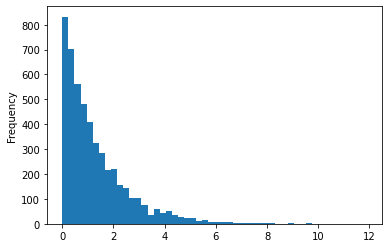

In [4]:
pd.Series(population).plot.hist(bins=50);

* H0: our samples are drawn from the same population
* H1: our samples are drawn from different population

In [5]:
s1 = np.random.choice(population, size=150)
s2 = np.random.choice(population, size=150)

In [6]:
stats.ttest_ind(s1, s2)

Ttest_indResult(statistic=1.6414235258930907, pvalue=0.10176444144279627)

p-value > .05. Thus, we can't reject the H0.

Let's now perform a t-test for samples from two different populations.

In [7]:
pop1 = np.random.normal(loc=15, scale=10, size=1500)
pop2 = np.random.normal(loc=12, scale=10, size=1500)

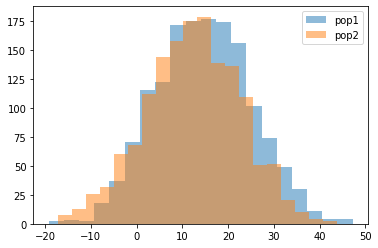

In [8]:
plt.hist(pop1, bins=20, alpha=0.5, label='pop1')
plt.hist(pop2, bins=20, alpha=0.5, label='pop2')
plt.legend(loc='upper right')
plt.show()

In [9]:
s1, s2 = np.random.choice(pop1, size=150), np.random.choice(pop2, size=150)

In [10]:
stats.ttest_ind(s1, s2)

Ttest_indResult(statistic=1.9942440862788076, pvalue=0.047036300806475806)

p-value < .05. The difference between two samples means is statistically significant. We can accept H1.

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/blood_pressure.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


In [12]:
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [13]:
rp.ttest(group1=df['bp_after'][df['sex']=='Male'], group1_name="Male",
         group2=df['bp_after'][df['sex']=='Female'], group2_name="Female")

(   Variable      N        Mean         SD        SE   95% Conf.    Interval
 0      Male   60.0  155.516667  15.243217  1.967891  151.578926  159.454407
 1    Female   60.0  147.200000  11.742722  1.515979  144.166533  150.233467
 2  combined  120.0  151.358333  14.177622  1.294234  148.795621  153.921046,
               Independent t-test   results
 0  Difference (Male - Female) =     8.3167
 1          Degrees of freedom =   118.0000
 2                           t =     3.3480
 3       Two side test p value =     0.0011
 4      Difference < 0 p value =     0.9995
 5      Difference > 0 p value =     0.0005
 6                   Cohen's d =     0.6112
 7                   Hedge's g =     0.6074
 8               Glass's delta =     0.5456
 9                 Pearson's r =     0.2945)

**Interpretation**

The average blood pressure after the treatment for males, M= 155.2 (151.6, 159.5), was statistically signigicantly higher than females, M= 147.2 (144.2, 150.2); t(118)= 3.3480, p= 0.001.

## Resampling methods

Resampling in statistics means to repeatedly sample values from observed data, with a general goal of assessing random variability in a statistic. It can also be used to assess and improve the accuracy of some machine-learning models.

In [14]:
# Sampling is done with replacement by default
np.random.choice(4, 12)

array([2, 2, 0, 1, 2, 3, 3, 3, 1, 1, 3, 2])

In [15]:
# Probability weights can be given
np.random.choice(4, 12, p=[.4, .1, .1, .4])

array([0, 0, 2, 1, 0, 2, 3, 3, 3, 3, 3, 3])

What is the 95% confidence interval for the mean of this data set if you didn't know how it was generated?


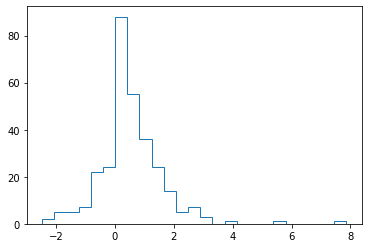

In [16]:
x = np.concatenate([np.random.exponential(size=200), np.random.normal(size=100)])
plt.hist(x, 25, histtype='step');

In [17]:
n = len(x)
reps = 10000
xb = np.random.choice(x, (n, reps))
mb = xb.mean(axis=0)
mb.sort()

np.percentile(mb, [2.5, 97.5])

array([0.41867642, 0.6645298 ])

## One-way ANOVA test

ANOVA stands for "Analysis of Variance" and is an omnibus test, meaning it tests for a difference overall between all groups. The one-way ANOVA, also referred to as one factor ANOVA, is a parametric test used to test for a statistically significant difference of an outcome between 3 or more groups. Since it is an omnibus test, it tests for a difference overall, i.e. at least one of the groups is statistically significantly different than the others. However, if the ANOVA is significant one cannot tell which group is different. In order to tell which group is different, one has to conduct planned or post-hoc comparisons.

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/difficile.csv")

In [22]:
df.head()

,person,dose,libido
0,1,1,3
1,2,1,2
2,3,1,1
3,4,1,1
4,5,1,4


In [23]:
df.shape

(15, 3)

In [24]:
df.drop('person', axis= 1, inplace= True)

In [25]:
# Recoding value from numeric to string
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)

In [26]:
df.head()

,dose,libido
0,placebo,3
1,placebo,2
2,placebo,1
3,placebo,1
4,placebo,4


In [27]:
rp.summary_cont(df['libido'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,libido,15.0,3.4667,1.7674,0.4563,2.4879,4.4454


In [28]:
rp.summary_cont(df['libido'].groupby(df['dose']))

,N,Mean,SD,SE,95% Conf.,Interval
dose,,,,,,
high,5,5.0,1.5811,0.7071,3.0368,6.9632
low,5,3.2,1.3038,0.5831,1.5811,4.8189
placebo,5,2.2,1.3038,0.5831,0.5811,3.8189


In [29]:
stats.f_oneway(df['libido'][df['dose'] == 'high'],
               df['libido'][df['dose'] == 'low'],
               df['libido'][df['dose'] == 'placebo'])

F_onewayResult(statistic=5.11864406779661, pvalue=0.024694289538222603)

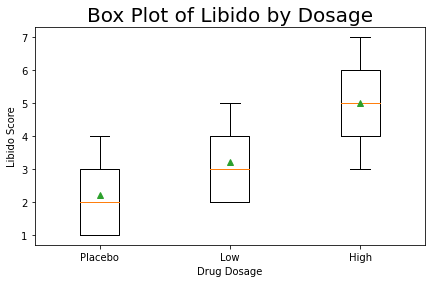

In [31]:
fig = plt.figure(figsize= (7, 4))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Libido by Dosage", fontsize= 20)
ax.set

data = [df['libido'][df['dose'] == 'placebo'],
        df['libido'][df['dose'] == 'low'],
        df['libido'][df['dose'] == 'high']]

ax.boxplot(data,
           labels= ['Placebo', 'Low', 'High'],
           showmeans= True)

plt.xlabel("Drug Dosage")
plt.ylabel("Libido Score")

plt.show()